###Μηχανική Μάθηση 
####1η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



Ονοματεπώνυμο φοιτητή: Ειρήνη Δόντη

Α.Μ.: 03119839

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1-L7QQEfLWCsqiBClxUlg4yzquf1G_Ga-/view?usp=sharing) και για το testing από [εδώ](https://drive.google.com/file/d/1-6l-NL3wwKGKJpVjxjUrOdFbcnKo-PwW/view?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [31]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df1=pd.read_csv("train-val.csv") 

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [32]:
df2=pd.read_csv("test.csv") 

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων, 

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

Show dataset info.

In [33]:
# Show dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

2α.

In [34]:
df1.shape # 48423 samples and 24 characteristics

(48423, 24)

2β.

In [35]:
df1.dtypes #types of characteristics

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

2γ.

In [36]:
attribute = []
j = 0

for i in df1.iloc[0]:
  if j <= 23:
    attribute.append(df1.axes[1][j])
    j = j + 1
  else: break
#print(attribute)

#labels of attributes
for k in range (0, len(attribute)):
  l = attribute[k]
  x = df1[l].unique()
  print (l, "labels:\n", x)


id labels:
 [    1     2     3 ... 48421 48422 48423]
Date labels:
 ['2009-03-04' '2009-03-05' '2009-03-09' ... '2008-10-05' '2008-11-10'
 '2008-07-11']
Location labels:
 ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
MinTemp labels:
 [13.8 11.5 15.5 18.4 20.9 17.1 16.4  8.4  9.3 10.8 10.1 10.4 12.2  7.8
  8.1  8.2 13.   3.5  7.  11.2 12.9  8.6  7.6  5.4  4.2  5.2  3.2  4.3
  3.6 10.3 12.4  3.   2.6  5.1  6.2  6.7  8.   2.2 10.6  8.9  1.7  4.7
  9.   6.3 -2.   0

2δ.

In [37]:
# We want the labels to be 0.0 or 1.0
count = 0
for k in range (0, len(attribute)):
  l = attribute[k]
  x = df1[l].unique()
  if(len(x) == 2 and (x[0] == 0.0 and x[1] == 1.0)):
    count = count + 1
print(" There are", count, "categories.")

 There are 2 categories.


2ε.

In [38]:
#(df1.notnull()).sum() #sum of not null samples per characteristic
sum1 = df1["RainToday"].notnull().sum()
sum2 = df1["RainTomorrow"].notnull().sum()
print("Category RainToday has:", sum1, "samples")
print("Category RainTommorow has:", sum2, "samples")

Category RainToday has: 48423 samples
Category RainTommorow has: 48423 samples


2στ.

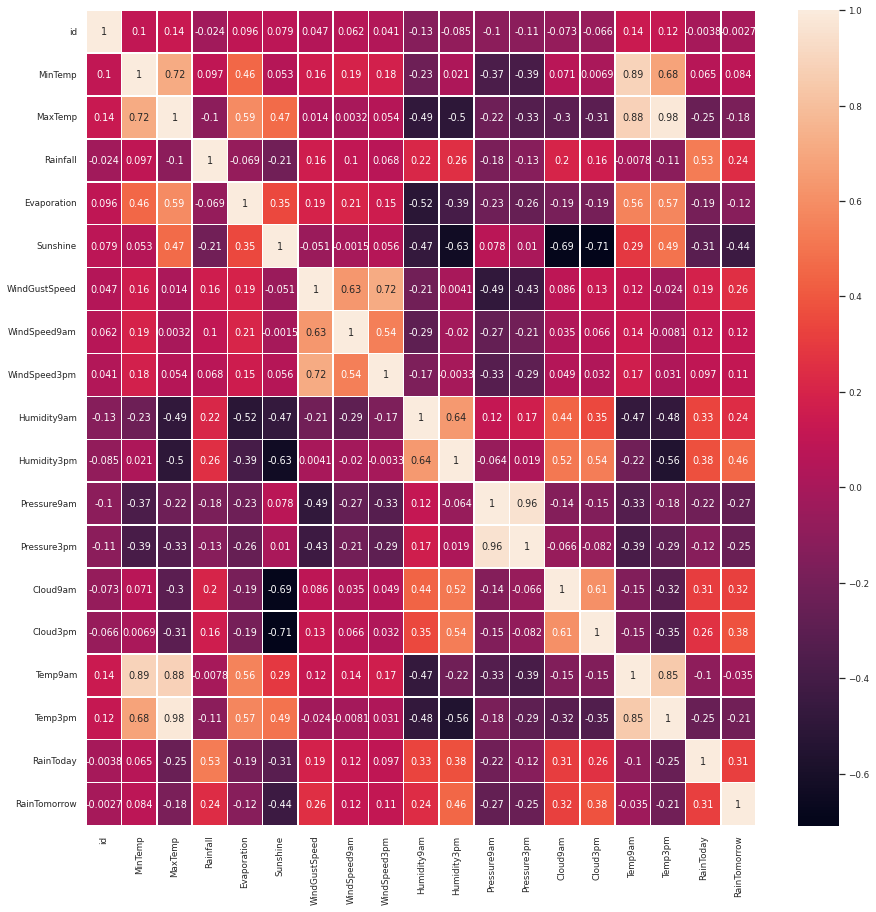

In [39]:
corr = df1.corr()
corr
%matplotlib inline
import seaborn as sns
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot = True,linewidths=.5, ax=ax)


2ζ.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a22f9d700>,
      dtype=object)

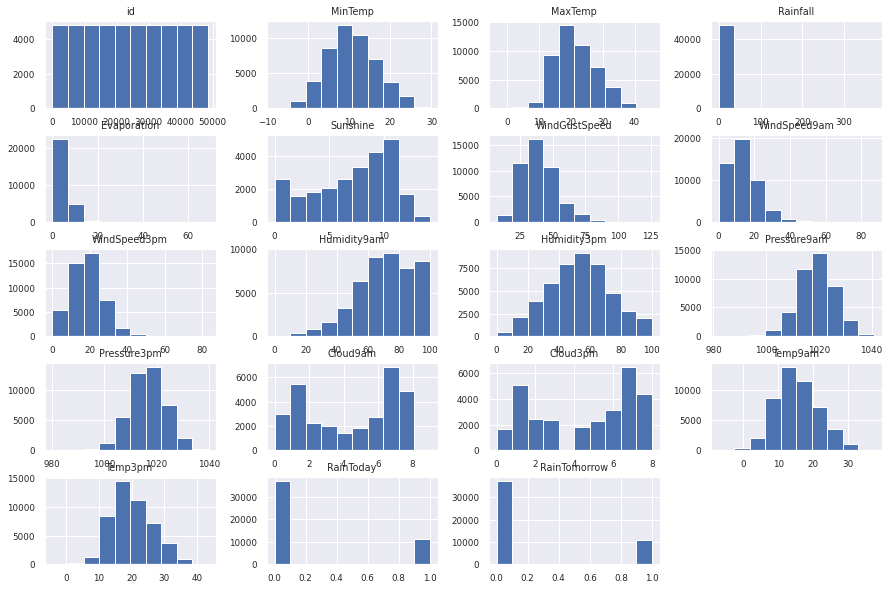

In [40]:
import matplotlib.pyplot as plt
#Binning 10
import matplotlib.pyplot as plt
df1.hist(bins=10, figsize=(15,10))

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας; 


In [41]:
#We use all the characteristics for the training of classifiers

Θα χρησιμοποιήσουμε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών.

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [42]:
# Show missing values
df1.isnull().sum()  #There are missing values

id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64

In [43]:
#handle missing numeric features
df1['MinTemp'] = df1['MinTemp'].fillna(df1['MinTemp'].mean())
df1['MaxTemp'] = df1['MaxTemp'].fillna(df1['MaxTemp'].mean())
df1['Evaporation'] = df1['Evaporation'].fillna(df1['Evaporation'].mean())
df1['Sunshine'] = df1['Sunshine'].fillna(df1['Sunshine'].mean())
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].mean())
df1['WindSpeed9am'] = df1['WindSpeed9am'].fillna(df1['WindSpeed9am'].mean())
df1['WindSpeed3pm'] = df1['WindSpeed3pm'].fillna(df1['WindSpeed3pm'].mean())
df1['Humidity9am'] = df1['Humidity9am'].fillna(df1['Humidity9am'].mean())
df1['Humidity3pm'] = df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())
df1['Pressure9am'] = df1['Pressure9am'].fillna(df1['Pressure9am'].mean())
df1['Pressure3pm'] = df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean())
df1['Cloud9am'] = df1['Cloud9am'].fillna(df1['Cloud9am'].mean())
df1['Cloud3pm'] = df1['Cloud3pm'].fillna(df1['Cloud3pm'].mean())
df1['Temp9am'] = df1['Temp9am'].fillna(df1['Temp9am'].mean())
df1['Temp3pm'] = df1['Temp3pm'].fillna(df1['Temp3pm'].mean())

#handle missing categorical features
value_WindGustDir = df1['WindGustDir'].value_counts().sort_index().idxmax()#value_counts().idxmax()
df1['WindGustDir'] = df1['WindGustDir'].fillna(value_WindGustDir)

value_WindDir9am = df1['WindDir9am'].value_counts().sort_index().idxmax()#value_counts().idxmax()
df1['WindDir9am'] = df1['WindDir9am'].fillna(value_WindDir9am)

value_WindDir3pm = df1['WindDir3pm'].value_counts().sort_index().idxmax()#value_counts().idxmax()
df1['WindDir3pm'] = df1['WindDir3pm'].fillna(value_WindDir3pm)
#df1.isnull().sum()

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [45]:
#One Hot Encoding 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding=OneHotEncoder(handle_unknown='ignore') 

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [46]:
# Characteristic Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

3.ε. Εκτελέστε όλα τα προηγούμενα βήματα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [48]:
# handle numeric features
numeric_features = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm'
,'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())]) 

In [49]:
# handle categorical features
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))]) 

In [50]:
# Create a transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.` 



In [51]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("weather",version=1,return_X_y=True)

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [52]:
from sklearn.model_selection import train_test_split

X = df1.drop('RainTomorrow', axis=1)
y = df1['RainTomorrow'] #target

# Split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # train set 70 % and validation set 30%

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας: 
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [53]:
#1
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

#2
from sklearn.neighbors import KNeighborsClassifier
kNc = KNeighborsClassifier()

#3
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#4
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
mlp = MLPClassifier()

#5
from sklearn.svm import SVC
svc = SVC()

#6
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()

#7
from sklearn.ensemble import RandomForestClassifier
rndforest = RandomForestClassifier()

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [54]:
from sklearn.pipeline import Pipeline
#1
from mlxtend.preprocessing import DenseTransformer
model_nbc = Pipeline(steps=[('preprocessor', preprocessor), ('to_dense', DenseTransformer()), ('classifier', nbc)])
model_nbc.fit(X_train, y_train)

#2
model_kNc = Pipeline(steps=[('preprocessor', preprocessor),('classifier', kNc)])
model_kNc.fit(X_train, y_train)

#3
model_LR = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LR)])
model_LR.fit(X_train, y_train)

#4
model_mlp = Pipeline(steps=[('preprocessor', preprocessor),('classifier', mlp)])
model_mlp.fit(X_train, y_train)

#5
model_svc = Pipeline(steps=[('preprocessor', preprocessor),('classifier', svc)])
model_svc.fit(X_train, y_train)

#6
model_dectree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dectree)])
model_dectree.fit(X_train, y_train)

#7
model_rndforest = Pipeline(steps=[('preprocessor', preprocessor),('classifier', rndforest)])
model_rndforest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Evaporation', 'Sunshine',
                                                   'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Clo

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [55]:
#1
preds1 = model_nbc.predict(X_test)

#2
preds2 = model_kNc.predict(X_test)

#3
preds3 = model_LR.predict(X_test)

#4
preds4 = model_mlp.predict(X_test)

#5
preds5 = model_svc.predict(X_test)

#6
preds6 = model_dectree.predict(X_test)

#7
preds7 = model_rndforest.predict(X_test)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#1
acscore1 = accuracy_score(y_test, preds1)
print(acscore1)
# compute the classification report
print(classification_report(y_test, preds1))

#2
acscore2 = accuracy_score(y_test, preds2) 
print(acscore2)
# compute the classification report
print(classification_report(y_test, preds2))

#3
acscore3 = accuracy_score(y_test, preds3) 
print(acscore3)
# compute the classification report
print(classification_report(y_test, preds3))

#4
acscore4 = accuracy_score(y_test, preds4) 
print(acscore4)
# compute the classification report
print(classification_report(y_test, preds4))

#5
acscore5 = accuracy_score(y_test, preds5) 
print(acscore5)
# compute the classification report
print(classification_report(y_test, preds5))

#6
acscore6 = accuracy_score(y_test, preds6) 
print(acscore6)
# compute the classification report
print(classification_report(y_test, preds6))

#7
acscore7 = accuracy_score(y_test, preds7) 
print(acscore7)
# compute the classification report
print(classification_report(y_test, preds7))

0.6789426584979693
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77     11256
         1.0       0.38      0.67      0.48      3271

    accuracy                           0.68     14527
   macro avg       0.63      0.68      0.63     14527
weighted avg       0.76      0.68      0.70     14527

0.8350657396571901
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     11256
         1.0       0.68      0.50      0.58      3271

    accuracy                           0.84     14527
   macro avg       0.77      0.71      0.74     14527
weighted avg       0.82      0.84      0.83     14527

0.8473876230467405
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     11256
         1.0       0.73      0.51      0.60      3271

    accuracy                           0.85     14527
   macro avg       0.80      0.73      0.75     14527
weighted avg     

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


0.4847547503314184   0.5753278979085431   0.6016172506738544   0.6102846054333764   0.6052186972029285   0.5242863548049618   0.607879234167894


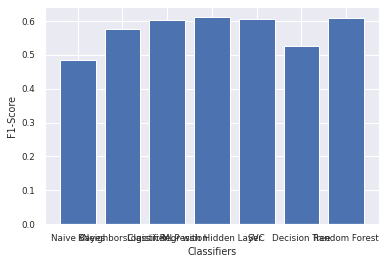

In [57]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
f1score1 = f1_score(y_test, preds1)
f1score2 = f1_score(y_test, preds2)
f1score3 = f1_score(y_test, preds3)
f1score4 = f1_score(y_test, preds4)
f1score5 = f1_score(y_test, preds5)
f1score6 = f1_score(y_test, preds6)
f1score7 = f1_score(y_test, preds7)

print(f1score1, " ", f1score2, " ",  f1score3," ", f1score4," ",  f1score5," ", f1score6," ", f1score7)

import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Naive Bayes", "KNeighborsClassifier", "LogisticRegression", "MLP with Hidden Layer", "SVC", "Decision Tree", "Random Forest"])
y = np.array([f1score1, f1score2, f1score3, f1score4, f1score5, f1score6, f1score7])
#y = np.array([acscore1, acscore2, acscore3, acscore4, acscore5, acscore6, acscore7])

plt.bar(x,y)
plt.xlabel("Classifiers")
plt.ylabel("F1-Score")
plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [58]:
best_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', mlp)]) # best classifier is MLP with one hidden layer
best_preds = best_model.predict(df2) #test

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [59]:
import csv  
import numpy as np
i = 0
with open('exerc5b.csv', 'w', newline='') as f:
    swriter = csv.writer(f, delimiter=',')
    swriter.writerow(['id', 'RainTomorrow'])
    while (i < len(best_preds)):
      swriter.writerow([df2.axes[0][i]+1,int(best_preds[i])])
      i = i + 1

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [60]:
from sklearn.model_selection import train_test_split

X = df1.drop('RainTomorrow', axis=1)
y = df1['RainTomorrow'] #target

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
# 6a
search_space1 = [{'classifier': [GaussianNB()],
                 'classifier__var_smoothing': np.logspace(0, -9, num=100)}]
                
search_space2 = [{'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 3, 5],
                 'classifier__metric': ['euclidean','manhattan']}]
                
search_space3 =[{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)
                }]

search_space4 =  [{'classifier': [MLPClassifier()],
                 'classifier__activation': ['relu'],
                 'classifier__solver': ['sgd', 'adam'],
                 'classifier__alpha': [0.0001, 0.05],
               #  'classifier__learnin_rate': ['constant']
                }]

search_space5 =  [{'classifier': [SVC()],
                 'classifier__kernel': ['rbf','linear'],  
                  }]

search_space6 = [{'classifier': [DecisionTreeClassifier()],
                 'classifier__criterion': ['gini']}]

search_space7 = [{ 'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': range(10, 300, 50),
                 'classifier__criterion': ['gini']}]
                 #'classifier__max_depth': range(1,10,1),

grid1=GridSearchCV(model_nbc, search_space1, cv=3, verbose=0, n_jobs=-1)
grid2 = GridSearchCV(model_kNc, search_space2, cv=3, verbose=0, n_jobs=-1)
grid3 = GridSearchCV(model_LR, search_space3, cv=3, verbose=0, n_jobs=-1)
grid4 = GridSearchCV(model_mlp, search_space4, cv=3, verbose=0, n_jobs=-1)
grid5 = GridSearchCV(model_svc, search_space5, cv=3, verbose=0, n_jobs=-1)
grid6 = GridSearchCV(model_dectree, search_space6, cv=3, verbose=0, n_jobs=-1)
grid7 = GridSearchCV(model_rndforest, search_space7, cv=3, verbose=0,  n_jobs=-1)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning

best_nbc = grid1.fit(X_train, y_train)
best_knc = grid2.fit(X_train, y_train)
best_LogReg = grid3.fit(X_train, y_train)
best_mlp = grid4.fit(X_train, y_train)
best_svc = grid5.fit(X_train, y_train)
best_dtree = grid6.fit(X_train, y_train)
best_rndf = grid7.fit(X_train, y_train)

# Access the best set of parameters
best_params1 = best_nbc.best_params_
best_params2 = best_knc.best_params_
best_params3 = best_LogReg.best_params_
best_params4 = best_mlp.best_params_
best_params5 = best_svc.best_params_
best_params6 = best_dtree.best_params_
best_params7 = best_rndf.best_params_

# Stores the optimum model in best_pipe
best_pipe1 = best_nbc.best_estimator_
best_pipe2 = best_knc.best_estimator_
best_pipe3 = best_LogReg.best_estimator_
best_pipe4 = best_mlp.best_estimator_
best_pipe5 = best_svc.best_estimator_
best_pipe6 = best_dtree.best_estimator_
best_pipe7 = best_rndf.best_estimator_


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [61]:
#1
best_preds1 = best_pipe1.predict(X_test)

#2
best_preds2 = best_pipe2.predict(X_test)

#3
best_preds3 = best_pipe3.predict(X_test)

#4
best_preds4 = best_pipe4.predict(X_test)

#5
best_preds5 = best_pipe5.predict(X_test)

#6
best_preds6 = best_pipe6.predict(X_test)

#7
best_preds7 = best_pipe7.predict(X_test)


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#1
acscore1 = accuracy_score(y_test, best_preds1)
print(acscore1)
# compute the classification report
print(classification_report(y_test, best_preds1))

#2
acscore2 = accuracy_score(y_test, best_preds2) 
print(acscore2)
# compute the classification report
print(classification_report(y_test, best_preds2))

#3
acscore3 = accuracy_score(y_test, best_preds3) 
print(acscore3)
# compute the classification report
print(classification_report(y_test, best_preds3))

#4
acscore4 = accuracy_score(y_test, best_preds4) 
print(acscore4)
# compute the classification report
print(classification_report(y_test, best_preds4))

#5
acscore5 = accuracy_score(y_test, best_preds5) 
print(acscore5)
# compute the classification report
print(classification_report(y_test, best_preds5))

#6
acscore6 = accuracy_score(y_test, best_preds6) 
print(acscore6)
# compute the classification report
print(classification_report(y_test, best_preds6))

#7
acscore7 = accuracy_score(y_test, best_preds7) 
print(acscore7)
# compute the classification report
print(classification_report(y_test, best_preds7))

0.8194396640737936
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     11256
         1.0       0.62      0.51      0.56      3271

    accuracy                           0.82     14527
   macro avg       0.74      0.71      0.72     14527
weighted avg       0.81      0.82      0.81     14527

0.8350657396571901
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     11256
         1.0       0.68      0.50      0.58      3271

    accuracy                           0.84     14527
   macro avg       0.77      0.71      0.74     14527
weighted avg       0.82      0.84      0.83     14527

0.8473876230467405
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     11256
         1.0       0.73      0.51      0.60      3271

    accuracy                           0.85     14527
   macro avg       0.80      0.73      0.75     14527
weighted avg     

6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


0.5611510791366906 0.5753278979085431 0.6016172506738544 0.6157112526539278 0.6052186972029285 0.5266448347722537 0.6065543417885576


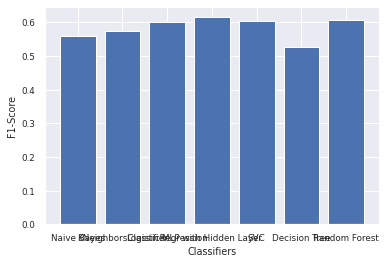

In [63]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
f1score1 = f1_score(y_test, best_preds1)
f1score2 = f1_score(y_test, best_preds2)
f1score3 = f1_score(y_test, best_preds3)
f1score4 = f1_score(y_test, best_preds4)
f1score5 = f1_score(y_test, best_preds5)
f1score6 = f1_score(y_test, best_preds6)
f1score7 = f1_score(y_test, best_preds7)



import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Naive Bayes", "KNeighborsClassifier", "LogisticRegression", "MLP with Hidden Layer", "SVC", "Decision Tree", "Random Forest"])
y = np.array([f1score1, f1score2, f1score3, f1score4, f1score5, f1score6, f1score7])
#y = np.array([acscore1, acscore2, acscore3, acscore4, acscore5, acscore6, acscore7])

print(f1score1, f1score2, f1score3, f1score4, f1score5, f1score6, f1score7)
plt.bar(x,y)
plt.xlabel("Classifiers")
plt.ylabel("F1-Score")
plt.show()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [64]:
#print(best_params4)
best_model = best_pipe4 # best classifier is MLP with one hidden layer  
best_preds = best_model.predict(df2)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [65]:
import csv  
import numpy as np
i = 0
with open('exerc7b.csv', 'w', newline='') as f:
    swriter = csv.writer(f, delimiter=',')
    swriter.writerow(['id', 'RainTomorrow'])
    while (i < len(best_preds)):
      swriter.writerow([df2.axes[0][i]+1,int(best_preds[i])])
      i = i + 1